<a href="https://colab.research.google.com/github/ericzundel/imagecapturegui/blob/main/Copy_of_Part_2_Kenadie_Smith_Final_Student_Recognition_Model_Template_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is the starting point of your final face recognition model.  You will need to fill in all of the missing boxes with correct code.  You are also required to write correct and descriptive comments in each block. Your model needs to reach a 80% accuracy on your testing data for your final project.**

In [ ]:
from tensorflow import keras # imports al of the necessary libraries and functions from libraries that are needed to run this code
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import numpy as np
import os, shutil, pathlib
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

In [ ]:
def show_image(im): #defines the function show image which iports what the graph is going to look like
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()

In [ ]:
def show_image_vpp(im,value,prediction,probability): # writes the function hat will say what the value is and hat the predicted value is
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()
  print("the value is ",student_names[value])
  print("The predicted value is ",student_names[prediction]," with probability: ",probability)

Keep this as is for now. Once you get everything running, you will come back to this and build out the layers using what you know.

In [ ]:
def build_model(input_shape): # builds the model with all  the different layers and returns the inputs and outputs
    input = keras.Input(shape=(input_shape,),name="data")
    l1 = layers.Dense(512,activation="relu")(input)
    l2 = layers.Dense(512,activation="relu")(l1)
    l3 = layers.Dense(512,activation="relu")(l2)
    l4 = layers.Dense(512,activation="relu")(l3)
    l5 = layers.Dense(512,activation="relu")(l4)
    output = layers.Dense(512,activation="softmax")(l5)
    model = keras.Model(inputs=input,outputs=output)
    return model

1) Explain what the 38 means in the output layer.  

Answer:  That represents the amount of Neurons in the output layer.

Note that the number of epochs below is 1.  Don't change it for now, but after you get everything else working, you will need to come back and address this to improve your model's accuracy.  

In [ ]:
def train_model(model,train_tensors,train_labels): # This trains the model with the labels and images to get the accuracy up
    model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    model.fit(train_tensors,train_labels,epochs=80)

2) How do you know if you need more or less epochs?  

*Answer*:  If youre accruacy is realy low then you need more epochs to get your accuracy up.

In [ ]:
def predict(model,test_tensors): # this predicts the model which is when you use the test labels and images  so it can see if it knows what to do
    mpredictions = model.predict(test_tensors)
    digit_predictions = np.array([x.argmax() for x in mpredictions])
    digit_probability = np.array([mpredictions[i][p] for i, p in enumerate(digit_predictions)])
    return digit_predictions,digit_probability

# Get the training and testing data.  Use this video if you are absent when I go over this in class.  

This is new code and it is not expected that you understand this, but you need to add a shortcut to this folder on your google drive.  Once you have your shortcut, replace the below path after "My Drive/" with your path. I will walk you through this step in class. Once you have done that, run this code to confirm you are accessing the class image files.  If you are not here when we do this part, you can watch this video of how to do it here: https://www.loom.com/share/4316be2eaac34ddfa1fcfed7d7bbbbcf?sid=725db59f-5ceb-43b4-bb14-5c37dd947108
  

Folder link: https://drive.google.com/drive/folders/1Lnhpm_B231bTZ8__k6Rw3BYDwei-dQYO?usp=sharing


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/ML_Image_Data/MLImages-backup-240416-140003"
plt.figure(figsize=(10, 10))
size_picture = 100

Mounted at /content/gdrive
 Alexandra_Price      Destin_Woolf	  Justin_Leake	  "Rhyland_O'Neill"
 Armon_Anderson       Donald_Humphrey	  Kaci_Turner	  'Tahlin_Thompson Saunders-Brathwaite'
 Austin_Smith	      Don_Evans		  Kenadie_Smith    Tarrence_Sturdivant
 Beth_White	      Emma_Davis	  Kendrick_Myers   Thorn_High
 Chase_Griffin	      Eric_Ayers	  Kristine_Allen   Trinity_Smith
 Christian_Hill       Jackson_Humphries   Laila_Shannon    Tunazi_Bello
 Cordarius_Williams   Jonathan_Thompson   Landon_Cox	   Victor_Hicks
 Curtis_Augustin      Joshua_Boney	  Lucian_Leon	  'Zediwa_De Jesus'
 David_Kurt	      Julian_Carlson	  Malik_Weems
 Destin_Jack	      Justin_Brown	  Peter_McKnight


<Figure size 1000x1000 with 0 Axes>

In [ ]:
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

3) In the digit recognition model, what did this (above) block of code do?  Break down your answer into all four parts.

Answer: it assigns all the train images and train labels along with the test iages and test labels to mnist.load_data.

Bonus: The combination of the two next functions will do what the above function did for the MNIST dataset.  You can get up to 40 KT bonus on your project if you can write correct line by line comments on what these lines of code do.  This must be your own work to be considered for bonus. Do not use another person or AI to help. If yo don't want bonus, just run the next two code blocks.

In [ ]:
def tensor_from_image(filename): # it deifnes a function called tensor_from_image with the parameter filename
    img = load_img(filename,color_mode = 'grayscale') # assigns load_img with the parameters filename and assigns the color_mode to grayscale and puts this all tto the name img
    img = img.resize((size_picture,size_picture)) # assigns img.resize with the size_picture that we want to the name img
    return img_to_array(img).reshape((size_picture,size_picture)) # return image_to_aray.reshape with the parameters size_picture, size_picture

In [ ]:
def load_dataset(): #defines the load data set
    train_images = [] # makes an empty list called train images
    train_labels = [] # makes an empty list called train_labels
    test_images = [] # makes an empty list called test_images
    test_labels = [] # makes an empty list called test_labels
    base_directory = pathlib.Path('/content/gdrive/My Drive/ML_Image_Data/MLImages-backup-240416-140003') # assigns the pathlib.Path to base_directory
    student_names = os.listdir(base_directory) # assigns the list directory to student name
    k = 0 #assigns k to 0
    n = 0 # assigns n to 0
    names = [] # makes an empty list called names
    for i, s in enumerate(student_names): # for each i,s enumerate all student names
        print(i,s) # print i,s
        if s!=".DS_Store": # if s is not equal t ".ds_store" do what follows
            names.append(s) # append the names
            student_directory = base_directory / s # assign the base_directory to student directory
            image_names = os.listdir(student_directory) # assifn the listdir witht the parameters student directory to image_names
            for i in image_names: # for i in image names do the following
                fname = student_directory / i # student directory / i is assigned to fname
                t = tensor_from_image(fname) / 255 # this assigns tensor_from_imgae to t
                if n % 9 == 0: # if n mod 9 equals 0 do the following
                    test_images.append(t) # append t to test_images
                    test_labels.append(k) # test k to test_labels
                else:
                    train_images.append(t) # append t to train images
                    train_labels.append(k) # append k to train_labels
                n += 1 # add 1 to n
            k += 1 # add 1 too k
    return (k,
            (np.array(train_images),np.array(train_labels)),
            (np.array(test_images),np.array(test_labels)),
            names
           ) #return the arrays of train_images train_labels test_images test_labels

Run this code to load your data.  

In [ ]:
(nb_students,(train_images,train_labels),(test_images,test_labels),student_names) = load_dataset() #this writes out all the names of the people ad assigsn teh images labels and names to load_dataset


0 Donald_Humphrey
1 Chase_Griffin
2 Armon_Anderson
3 Joshua_Boney
4 Destin_Jack
5 Beth_White
6 Lucian_Leon
7 Jonathan_Thompson
8 Tahlin_Thompson Saunders-Brathwaite
9 Julian_Carlson
10 Laila_Shannon
11 Destin_Woolf
12 Malik_Weems
13 Kaci_Turner
14 Thorn_High
15 Cordarius_Williams
16 Tunazi_Bello
17 Victor_Hicks
18 Peter_McKnight
19 Zediwa_De Jesus
20 Justin_Brown
21 Alexandra_Price
22 Kendrick_Myers
23 Eric_Ayers
24 Curtis_Augustin
25 Kenadie_Smith
26 Rhyland_O'Neill
27 Justin_Leake
28 Jackson_Humphries
29 Tarrence_Sturdivant
30 Austin_Smith
31 Kristine_Allen
32 David_Kurt
33 Emma_Davis
34 Landon_Cox
35 Christian_Hill
36 Trinity_Smith
37 Don_Evans


Print out each of the six items in the loaded data to get an idea of or refresh yourself on what they are.

4) Print the first item.

In [ ]:
nb_students # calls the nb_students function

38

5) Print the second item.

In [ ]:
train_images # prints train images

array([[[0.6313726 , 0.6313726 , 0.6313726 , ..., 0.6       ,
         0.6431373 , 0.63529414],
        [0.6313726 , 0.6313726 , 0.627451  , ..., 0.6509804 ,
         0.69803923, 0.6392157 ],
        [0.6313726 , 0.6313726 , 0.6313726 , ..., 0.65882355,
         0.7019608 , 0.6431373 ],
        ...,
        [0.47843137, 0.49019608, 0.5058824 , ..., 0.7882353 ,
         0.78039217, 0.7882353 ],
        [0.45882353, 0.4509804 , 0.44705883, ..., 0.72156864,
         0.7882353 , 0.7137255 ],
        [0.47058824, 0.4627451 , 0.4745098 , ..., 0.64705884,
         0.7882353 , 0.6156863 ]],

       [[0.6313726 , 0.627451  , 0.627451  , ..., 0.6       ,
         0.6392157 , 0.6313726 ],
        [0.627451  , 0.62352943, 0.62352943, ..., 0.6431373 ,
         0.69803923, 0.63529414],
        [0.627451  , 0.62352943, 0.62352943, ..., 0.654902  ,
         0.69803923, 0.6392157 ],
        ...,
        [0.4745098 , 0.49019608, 0.5058824 , ..., 0.78039217,
         0.7764706 , 0.78039217],
        [0.4

6) Print the third item.

In [ ]:
train_labels # prints train labels

array([ 0,  0,  0, ..., 37, 37, 37])

7) Print the 4th item.

In [ ]:
test_images # prints test_images

array([[[0.69411767, 0.69803923, 0.7019608 , ..., 0.5176471 ,
         0.5568628 , 0.5372549 ],
        [0.69803923, 0.6784314 , 0.6392157 , ..., 0.54901963,
         0.59607846, 0.57254905],
        [0.5058824 , 0.4392157 , 0.39215687, ..., 0.53333336,
         0.5921569 , 0.54901963],
        ...,
        [0.38039216, 0.37254903, 0.35686275, ..., 0.6313726 ,
         0.64705884, 0.65882355],
        [0.3647059 , 0.2901961 , 0.23529412, ..., 0.54901963,
         0.65882355, 0.54901963],
        [0.2       , 0.16470589, 0.19215687, ..., 0.49803922,
         0.6392157 , 0.5254902 ]],

       [[0.5882353 , 0.58431375, 0.58431375, ..., 0.57254905,
         0.61960787, 0.6156863 ],
        [0.58431375, 0.5803922 , 0.5803922 , ..., 0.6156863 ,
         0.6745098 , 0.6313726 ],
        [0.58431375, 0.58431375, 0.58431375, ..., 0.62352943,
         0.68235296, 0.62352943],
        ...,
        [0.46666667, 0.46666667, 0.47058824, ..., 0.7411765 ,
         0.7411765 , 0.7490196 ],
        [0.4

8) Print the 5th item.

In [ ]:
test_labels #prints test_labels

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  8,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18,
       18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 27

9) Print the 6th item.

In [ ]:
student_names # prints student names

['Donald_Humphrey',
 'Chase_Griffin',
 'Armon_Anderson',
 'Joshua_Boney',
 'Destin_Jack',
 'Beth_White',
 'Lucian_Leon',
 'Jonathan_Thompson',
 'Tahlin_Thompson Saunders-Brathwaite',
 'Julian_Carlson',
 'Laila_Shannon',
 'Destin_Woolf',
 'Malik_Weems',
 'Kaci_Turner',
 'Thorn_High',
 'Cordarius_Williams',
 'Tunazi_Bello',
 'Victor_Hicks',
 'Peter_McKnight',
 'Zediwa_De Jesus',
 'Justin_Brown',
 'Alexandra_Price',
 'Kendrick_Myers',
 'Eric_Ayers',
 'Curtis_Augustin',
 'Kenadie_Smith',
 "Rhyland_O'Neill",
 'Justin_Leake',
 'Jackson_Humphries',
 'Tarrence_Sturdivant',
 'Austin_Smith',
 'Kristine_Allen',
 'David_Kurt',
 'Emma_Davis',
 'Landon_Cox',
 'Christian_Hill',
 'Trinity_Smith',
 'Don_Evans']

10) Assign the shape of train_images to train_shape. Print train_shape.

In [ ]:
train_shape = train_images.shape # assigns the shape of train_imaes to train shape and prints it
print(train_shape)

(2244, 100, 100)


11) Print out the first image train_images in matrix format.



In [ ]:
train_images # prints train images out in the matrix format

array([[[0.6313726 , 0.6313726 , 0.6313726 , ..., 0.6       ,
         0.6431373 , 0.63529414],
        [0.6313726 , 0.6313726 , 0.627451  , ..., 0.6509804 ,
         0.69803923, 0.6392157 ],
        [0.6313726 , 0.6313726 , 0.6313726 , ..., 0.65882355,
         0.7019608 , 0.6431373 ],
        ...,
        [0.47843137, 0.49019608, 0.5058824 , ..., 0.7882353 ,
         0.78039217, 0.7882353 ],
        [0.45882353, 0.4509804 , 0.44705883, ..., 0.72156864,
         0.7882353 , 0.7137255 ],
        [0.47058824, 0.4627451 , 0.4745098 , ..., 0.64705884,
         0.7882353 , 0.6156863 ]],

       [[0.6313726 , 0.627451  , 0.627451  , ..., 0.6       ,
         0.6392157 , 0.6313726 ],
        [0.627451  , 0.62352943, 0.62352943, ..., 0.6431373 ,
         0.69803923, 0.63529414],
        [0.627451  , 0.62352943, 0.62352943, ..., 0.654902  ,
         0.69803923, 0.6392157 ],
        ...,
        [0.4745098 , 0.49019608, 0.5058824 , ..., 0.78039217,
         0.7764706 , 0.78039217],
        [0.4

12) Print out the first image in train images in image format.

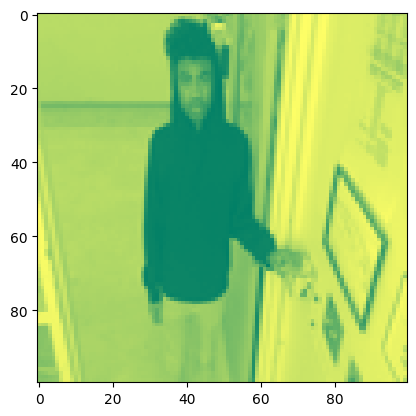

In [ ]:

show_image(train_images[0]) # prints train images in image format

13) Print out the label for this image.

In [ ]:
train_labels[0] #pritns the label for image 0

0

Print out the name associated with this label.

In [ ]:
student_names[0] #prints the name that is assigned to this label

'Donald_Humphrey'

14) Print out the second name in student_names.

In [ ]:
student_names[1] # prints out th second name or index 1 of the student_names

'Chase_Griffin'

15) Write a for loop to print out all of the names in the list student_names and their indices (indexes).  

In [ ]:
for i in range(37): # this prints every students name plus their index which is i
  print(student_names[i], i)


Donald_Humphrey 0
Chase_Griffin 1
Armon_Anderson 2
Joshua_Boney 3
Destin_Jack 4
Beth_White 5
Lucian_Leon 6
Jonathan_Thompson 7
Tahlin_Thompson Saunders-Brathwaite 8
Julian_Carlson 9
Laila_Shannon 10
Destin_Woolf 11
Malik_Weems 12
Kaci_Turner 13
Thorn_High 14
Cordarius_Williams 15
Tunazi_Bello 16
Victor_Hicks 17
Peter_McKnight 18
Zediwa_De Jesus 19
Justin_Brown 20
Alexandra_Price 21
Kendrick_Myers 22
Eric_Ayers 23
Curtis_Augustin 24
Kenadie_Smith 25
Rhyland_O'Neill 26
Justin_Leake 27
Jackson_Humphries 28
Tarrence_Sturdivant 29
Austin_Smith 30
Kristine_Allen 31
David_Kurt 32
Emma_Davis 33
Landon_Cox 34
Christian_Hill 35
Trinity_Smith 36


16) Reshape your train_images "from a box into a line" and assign them to train_tensors.  Print out train_tensors.shape to confirm that they have been put into a line.  

In [ ]:
train_tensors = train_images.reshape(train_shape[0],train_shape[1]*train_shape[2]) # this reshapes the trian images and assigns it to train_tensors
train_tensors.shape

(2244, 10000)

17) Call the build model function with the correct parameter (the second value in train_tensors.shape).

In [ ]:
build_model(train_shape[1]*train_shape[2]) # this calls the build model with the second value f train_tensors.shape

18) Print out the model summary using the summary method.

In [ ]:
Model = build_model(train_shape[1]*train_shape[2])# this assigns the build_model with the second value nd assigns is to Model then it uses the summary method
Model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data (InputLayer)           [(None, 10000)]           0         
                                                                 
 dense_6 (Dense)             (None, 512)               5120512   
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 512)               2626

19) Call the train model function with the appropraite parameters. Remember all functions are defined above if you need a reference.

In [ ]:
train_model(Model,train_tensors,train_labels) # this calls the train model which uses epoch to find the accuracy with the parameters Model, trai-tenosrs and train_labels.

Epoch 1/80
71/71 [==============================] - 9s 106ms/step - loss: 3.9409 - accuracy: 0.0758
Epoch 2/80
71/71 [==============================] - 6s 81ms/step - loss: 3.3261 - accuracy: 0.0989
Epoch 3/80
71/71 [==============================] - 7s 101ms/step - loss: 3.1548 - accuracy: 0.1386
Epoch 4/80
71/71 [==============================] - 6s 87ms/step - loss: 2.9797 - accuracy: 0.1689
Epoch 5/80
71/71 [==============================] - 6s 81ms/step - loss: 2.8327 - accuracy: 0.2090
Epoch 6/80
71/71 [==============================] - 7s 100ms/step - loss: 2.6775 - accuracy: 0.2291
Epoch 7/80
71/71 [==============================] - 5s 75ms/step - loss: 2.5778 - accuracy: 0.2473
Epoch 8/80
71/71 [==============================] - 7s 95ms/step - loss: 2.4547 - accuracy: 0.2585
Epoch 9/80
71/71 [==============================] - 6s 82ms/step - loss: 2.3722 - accuracy: 0.2963
Epoch 10/80
71/71 [==============================] - 5s 76ms/step - loss: 2.2613 - accuracy: 0.3142
Epoch 

20) What is an epoch?

Answer: An epoch is the machine going through all the labels and images and testing to see their accuracy and it keeps going until it gets to a high accuracy.

21) The model is trained; it is time to see how well it does at recognizing your faces!!  To do this you need to reshape the testing dataset and assign it to test_shape.


In [ ]:
test_shape = test_images.shape # this assigns the test images shape to test_shape and calls it
test_shape

(281, 100, 100)

22) Reshape your test_images "from a box to a line" and assign them to test_tensors.

In [ ]:
test_tensors = test_images.reshape(test_shape[0], test_shape[1]*test_shape[2]) # assgins the reshaped test images to test_tensors

23) Print your 20th test image in matrix format.

In [ ]:
test_tensors[21] # calls test tensors which is indexed to 20th image

array([0.67058825, 0.67058825, 0.67058825, ..., 0.60784316, 0.72156864,
       0.5529412 ], dtype=float32)

24) Print your 20th test image in image format.

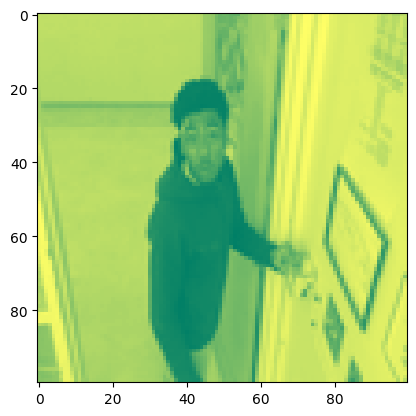

In [ ]:
show_image(test_images[19]) # shows the 20th image in image format

25) Print the label that represents this image (numerical value).  

In [ ]:
test_labels[19] # prints the label that goeswith the picture

4

26) Print the corresponding students' name that is represented by this image.

In [ ]:
student_names[19] # This is the name that is assiged to the image

'Zediwa_De Jesus'

Now we can make predictions and get probabilities.  I will be checking this block to make sure that everything above it has run. Do not edit this block of code at all.

In [ ]:
pred, prob = predict(Model,test_tensors) # this assigns the predict function with the parameters MOdel and test_tenosrs to pred and prob

9/9 [==============================] - 0s 18ms/step


In [ ]:
pred # calls pred

array([ 0,  0,  0,  0,  0,  1, 28,  1,  1,  1,  3,  7,  3,  3,  4, 23,  4,
        4,  4,  4,  4,  4,  4,  4, 23,  5, 28, 23,  5, 30, 31,  6,  6,  6,
        6,  6,  6,  6, 28,  5,  6,  6,  7,  6,  7,  7,  7,  7, 30, 30, 30,
       30, 30,  9,  9,  9,  9,  9,  9, 20,  9, 15, 10, 25, 10, 10, 20, 10,
       10, 10, 10, 10, 25, 10,  3, 11, 11,  3, 11, 11, 11, 11, 26, 20, 11,
       11, 31, 26, 12, 12, 31, 12, 12, 12, 21, 21,  4, 13, 27,  4, 13,  9,
       14, 14, 14, 15, 15, 15, 15, 20, 15,  0, 20,  0, 15,  0, 15, 12, 12,
        0, 15, 15,  0, 16, 16, 13, 13, 16, 16,  9, 16, 18, 18, 20, 23, 18,
       18, 20, 19, 19, 20, 20, 19, 20, 19,  7, 30, 28, 19, 20, 29, 20, 20,
       20, 28, 20, 20, 20, 20, 20, 20, 20, 20, 20, 30, 15, 21, 23, 21, 21,
       21, 21, 28, 26, 20, 23,  9, 23, 23, 23, 23, 23, 23, 23, 31,  9, 23,
       23,  9, 30, 23, 23, 23, 23, 23,  9, 23, 23, 26, 23, 31,  9, 23, 24,
       25, 25, 25, 25, 18, 25, 25, 25,  9, 28, 25, 25, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 27

27) Describe what these numerical values mean.

*Answer*: This is the prediction for the values

In [ ]:
prob # calls prob

array([0.99999994, 0.99952453, 0.9999954 , 0.9999996 , 0.98962593,
       0.98991233, 0.9646994 , 0.6996806 , 0.533064  , 0.8973721 ,
       0.71719146, 0.97267574, 0.95402503, 0.9471206 , 0.9999928 ,
       0.9999817 , 0.33572862, 0.67443806, 0.9938797 , 0.97439736,
       0.43103734, 0.97344035, 0.99764633, 0.5708165 , 0.44260707,
       0.58431435, 0.5833322 , 0.5496701 , 0.9600296 , 0.4795377 ,
       0.7956007 , 0.763328  , 0.9999917 , 0.99759007, 0.94157255,
       0.99999994, 0.9853882 , 0.9999693 , 0.72285   , 0.9903113 ,
       0.9983191 , 0.99940765, 0.9905611 , 0.69741213, 0.9999996 ,
       0.9977867 , 0.95250654, 0.99999994, 0.9702697 , 0.96728   ,
       0.9971373 , 0.99991685, 0.9989724 , 0.99957377, 0.98609287,
       0.6346483 , 0.9987419 , 0.9983524 , 0.5870661 , 0.94037616,
       0.99573505, 0.46102065, 0.99992305, 0.9609057 , 0.5418073 ,
       0.9178038 , 0.34289664, 0.8324181 , 0.29776287, 0.48791626,
       0.6069289 , 0.8905428 , 0.81056666, 0.9722836 , 0.99961

28) Describe what these numerical values mean.

Answer:   this is the pobability of the score being right

29) Print the 30th image in the test image dataset, its label and prediction and probability.

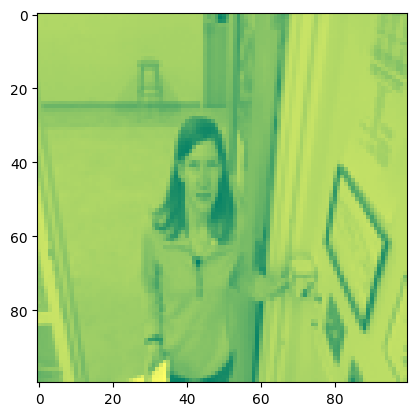

the value is  Beth_White
The predicted value is  Austin_Smith  with probability:  0.4795377


In [ ]:
show_image_vpp(test_images[29], test_labels[29], pred[29],prob[29]) # prints the image, label, predicted label and the probability of it being right


30) Plot the 3rd image in the test_images dataset, its label, prediction, and probability.  

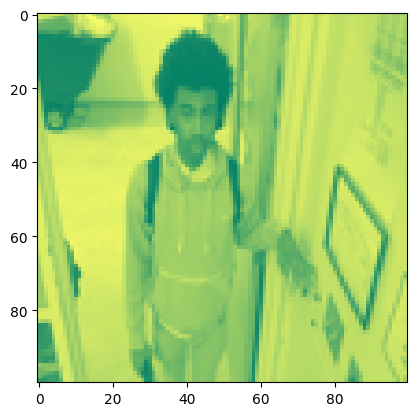

the value is  Donald_Humphrey
The predicted value is  Donald_Humphrey  with probability:  0.9999954


In [ ]:
show_image_vpp(test_images[2], test_labels[2], pred[2],prob[2]) # prints the image, label, predicted label and the probability of it being right


Compute the number of wrong predictions. If everything above is running correctly this code block should run. Do not change it.  

In [ ]:
wrong_predictions_count = 0 # this is counting how many wrong predictions the are in eveything
for i in range(test_images.shape[0]):
    if test_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

95

31) Explain which two items are being compared in your own words to get the "wrong_predictions."

Answer: The actual test label with the predicted label

Determine the number of wrong predictions in the test dataset.  If everything above is running correctly this code block should run. Do not change it.

In [ ]:
wrong_predictions_count = 0 # this does the same thing as the one above but it uses test instead of train labels
for i in range(test_images.shape[0]):
    if test_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

95

Calculate the accuracy on the test_images.  If everything above is running correctly this code block should run. Do not change it.

In [ ]:
accuracy = 1-(wrong_predictions_count/len(test_labels)) # this finds the accuracy of the test labels
accuracy

0.6619217081850534

32) Determine the number of wrong predictions in the training dataset.  


In [ ]:
wrong_predictions_count = 0 # this finds the amount of wrong predicitions there are in the epochs
for i in range(test_images.shape[0]):
    if train_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

274

33) Calculate the accuracy on the training_images.  

In [ ]:
accuracy = 1-(wrong_predictions_count/len(train_labels)) # this find the accuacy of the train labels
accuracy

0.8778966131907309

34) Describe why the accuracy of the training images is higher than that of the testing images.  

Answer: The accuracy is higher beacuse tat are tested more frequently and thats where the machine learns how to test it.


35) Display the first 10 faces in the training dataset, their predictions and probabilities.


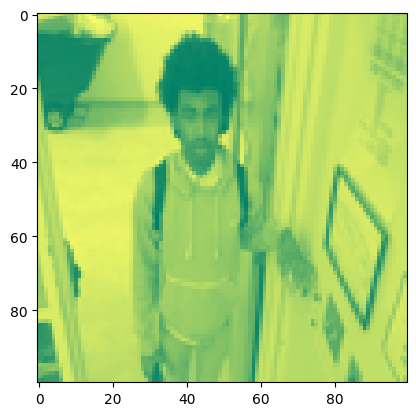

the value is  Donald_Humphrey
The predicted value is  Donald_Humphrey  with probability:  0.99999994


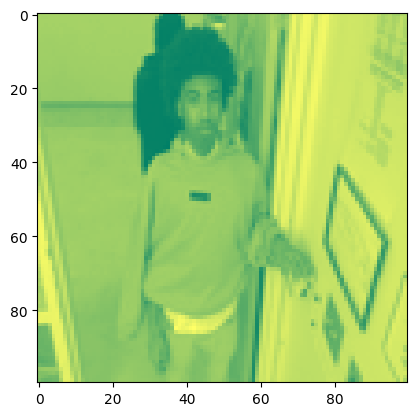

the value is  Donald_Humphrey
The predicted value is  Donald_Humphrey  with probability:  0.99952453


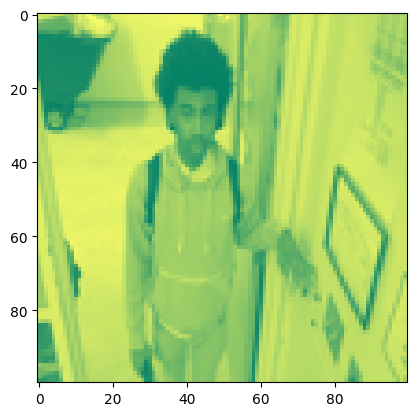

the value is  Donald_Humphrey
The predicted value is  Donald_Humphrey  with probability:  0.9999954


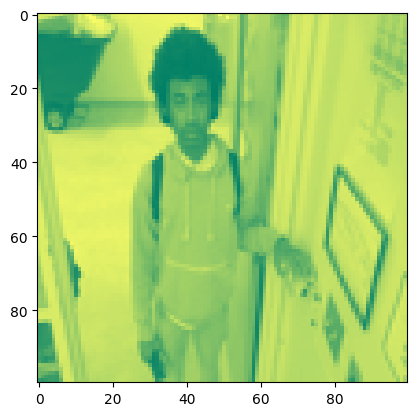

the value is  Donald_Humphrey
The predicted value is  Donald_Humphrey  with probability:  0.9999996


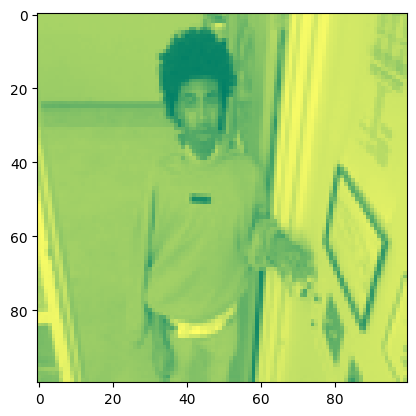

the value is  Donald_Humphrey
The predicted value is  Donald_Humphrey  with probability:  0.98962593


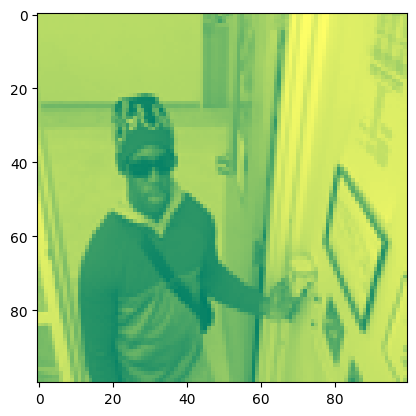

the value is  Chase_Griffin
The predicted value is  Chase_Griffin  with probability:  0.98991233


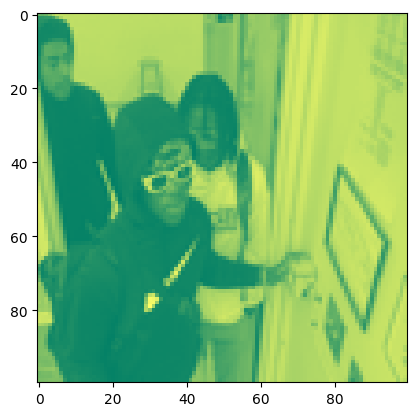

the value is  Chase_Griffin
The predicted value is  Jackson_Humphries  with probability:  0.9646994


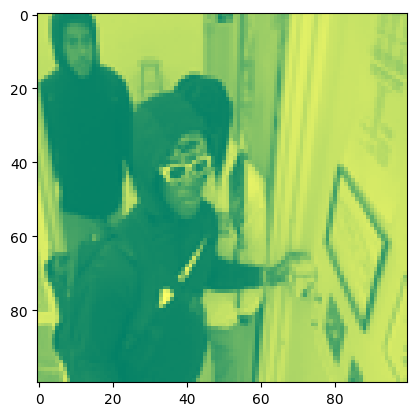

the value is  Chase_Griffin
The predicted value is  Chase_Griffin  with probability:  0.6996806


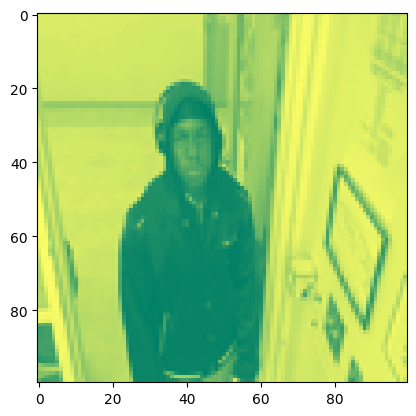

the value is  Chase_Griffin
The predicted value is  Chase_Griffin  with probability:  0.533064


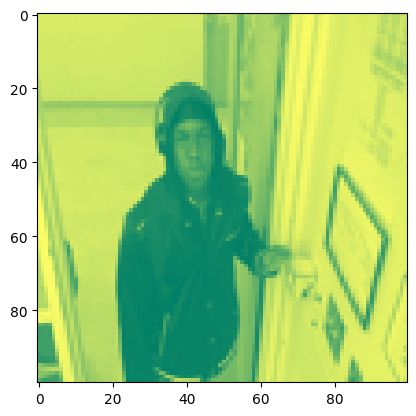

the value is  Chase_Griffin
The predicted value is  Chase_Griffin  with probability:  0.8973721


In [ ]:
for i in range(10): # this shows teh images and labels and prediciton and probability for 10 images
  show_image_vpp(test_images[i], test_labels[i], pred[i],prob[i])



Evaluate the accuracy of the test set using model.evaluate.  Do not change this code.


In [ ]:
Model.evaluate(train_tensors, train_labels) # this uses the evaluate tool on the function Model on train_tensors an train_labels

71/71 [==============================] - 1s 16ms/step - loss: 1.1368 - accuracy: 0.7344


[1.1367651224136353, 0.7344028353691101]

Evaluate the accuracy of the test set using model.evaluate.  Do not change this code.

In [ ]:
Model.evaluate(test_tensors, test_labels) # uses the model evaluate on the test_tensors and test labels

9/9 [==============================] - 0s 16ms/step - loss: 2.0617 - accuracy: 0.6619


[2.061721086502075, 0.6619216799736023]

Once you get this entire model working (don't worry about the accuracy yet), call me over to grade it.  Once you get it working it will be time to manipulate the building model function and training model function for accuracy.  